In [1]:
import os
from pathlib import Path

import pandas as pd

from utils import plot_label_dist, set_seed

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'images__bodyparts_labels.csv'

In [2]:
df = pd.read_csv(SRC_DATASET_ROOT / SRC_DATASET_NAME, index_col=0)
# count the number of labels per sample
_labels = df.drop(['file_name'], axis=1)
df['label_count'] = _labels.sum(axis=1)
_zero_labels_filter = df['label_count'] != 0
df = df[_zero_labels_filter]
df

,asshole,belly_button,cum,hairy_pussy,labia,wet_pussy,tongue,ass,balls,boobs,...,dick,feet,lower_legs,nipples,pussy,pink_pussy,pussy_closeup,shaved_pussy,file_name,label_count
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0.jpg,2
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1.jpg,2
2,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,2.jpg,3
3,1,1,0,0,0,0,1,1,1,1,...,1,1,1,1,1,0,0,1,3.jpg,13
4,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,4.jpg,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625140,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,1,625140.jpg,8
625141,0,1,0,0,0,0,0,0,0,1,...,0,1,1,1,1,0,0,1,625141.jpg,7
625142,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,1,1,625142.jpg,9
625143,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,625143.jpg,5


In [3]:
file_names = df[['file_name']]
label_df = df.drop(['label_count', 'file_name'], axis=1)
label_df.shape

(571906, 19)

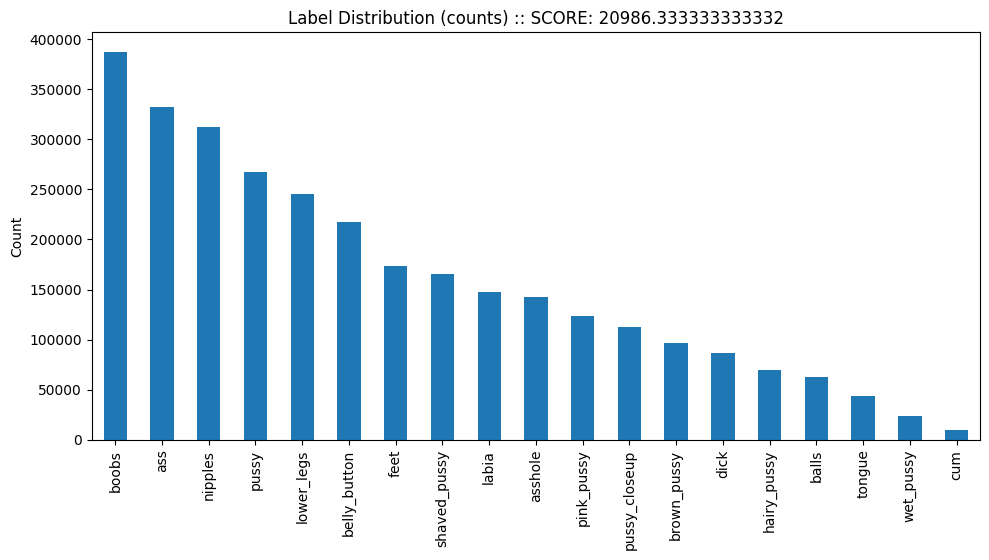

In [4]:
filtered_counts = plot_label_dist(label_df)

# Get only the labels below a certain threshold

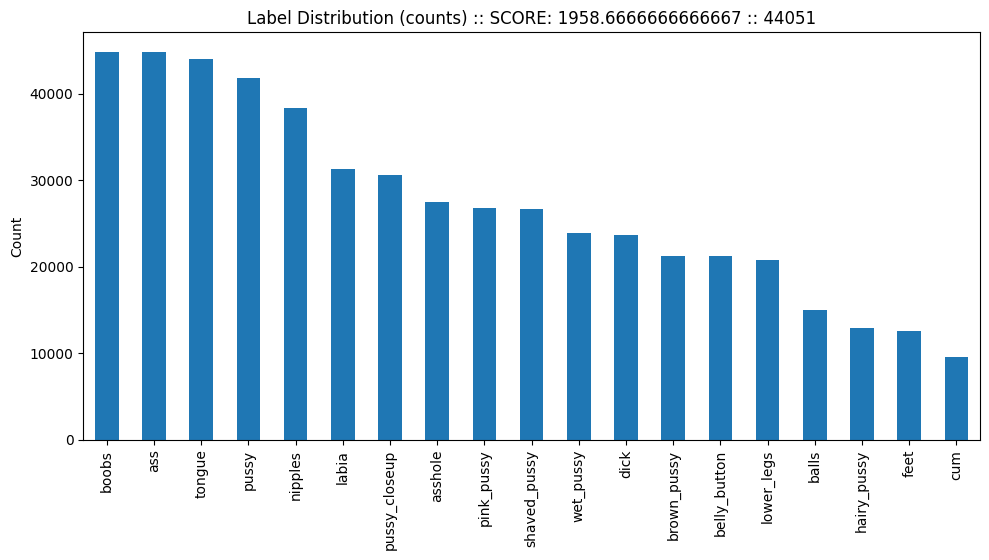

In [5]:


threshold = 44051

# for threshold in tqdm(filtered_counts.values):
sampled_labels = filtered_counts[filtered_counts <= threshold].index.tolist()

original_labels = label_df.columns.tolist()

sampled_df = label_df[sampled_labels].copy()
sampled_df['label_count'] = sampled_df.sum(axis=1)
_zero_labels_filter = sampled_df['label_count'] != 0
sampled_df = sampled_df[_zero_labels_filter]
sampled_df = sampled_df.drop(['label_count'], axis=1)

sampled_index = sampled_df.index.tolist()
_merge_filter = label_df.index.isin(sampled_index)
_merged_df = label_df.loc[_merge_filter]
_ = plot_label_dist(_merged_df, name=threshold)

In [6]:
_merged_df

,asshole,belly_button,cum,hairy_pussy,labia,wet_pussy,tongue,ass,balls,boobs,brown_pussy,dick,feet,lower_legs,nipples,pussy,pink_pussy,pussy_closeup,shaved_pussy
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
4,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1
7,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0
48,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625088,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
625137,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1
625138,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1
625140,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1


In [7]:
_merged_df.shape

(71483, 19)

In [8]:
merged_ = file_names.merge(_merged_df, left_index=True, right_index=True)
merged_.reset_index(inplace=True, drop=True)
merged_

,file_name,asshole,belly_button,cum,hairy_pussy,labia,wet_pussy,tongue,ass,balls,boobs,brown_pussy,dick,feet,lower_legs,nipples,pussy,pink_pussy,pussy_closeup,shaved_pussy
0,1.jpg,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,3.jpg,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
2,4.jpg,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1
3,7.jpg,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0
4,48.jpg,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71478,625088.jpg,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
71479,625137.jpg,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1
71480,625138.jpg,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1
71481,625140.jpg,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1


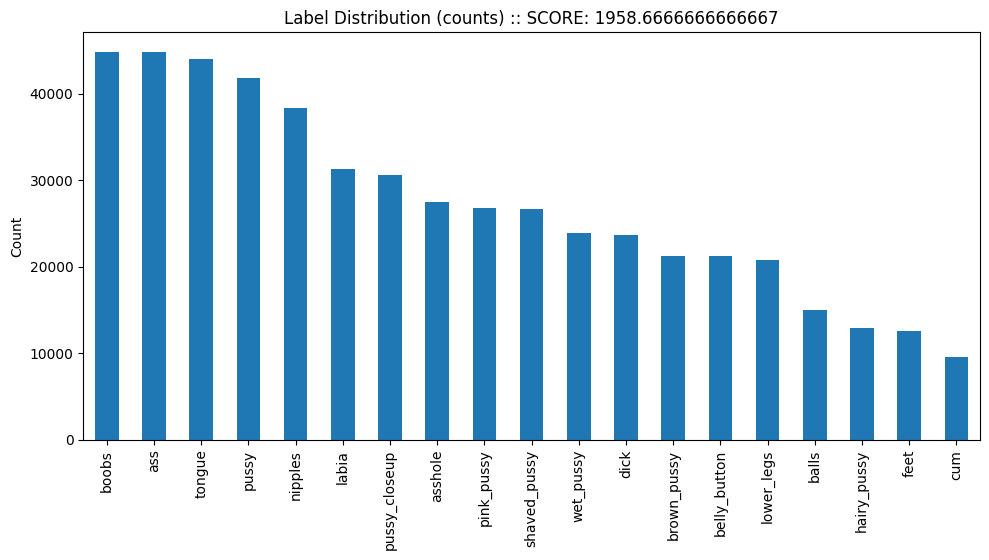

boobs            44835
ass              44757
tongue           44051
pussy            41785
nipples          38333
labia            31292
pussy_closeup    30579
asshole          27482
pink_pussy       26842
shaved_pussy     26661
wet_pussy        23871
dick             23664
brown_pussy      21272
belly_button     21208
lower_legs       20784
balls            15020
hairy_pussy      12906
feet             12566
cum               9579
dtype: int64

In [9]:
plot_label_dist(merged_.drop(['file_name'], axis=1))

In [10]:
merged_.to_csv(SRC_DATASET_ROOT / 'balanced_bodyparts_labels.csv')

In [11]:
from tqdm import tqdm
import shutil
from concurrent.futures import ThreadPoolExecutor

COMPILED_DATASET = SRC_DATASET_ROOT / 'compiled'
COMPILED_DATASET.mkdir(exist_ok=True)

def copy_the_image(image_path: str):
    src = SRC_DATASET_ROOT / 'images' / image_path
    dst = COMPILED_DATASET / image_path
    if dst.exists():
        return

    shutil.copy(
        src,
        dst
    )


with ThreadPoolExecutor(max_workers=16) as executor:
    futures = [
        executor.submit(copy_the_image, fp) for fp in merged_['file_name'].tolist()
    ]

    for future in tqdm(futures, total=len(futures)):
        _ = future.result()

100%|██████████| 71483/71483 [00:07<00:00, 9201.36it/s] 


In [14]:
import os

len(os.listdir(COMPILED_DATASET))

123333